In [37]:
m = 2**32
a = 1664525
c = 1013904223
x_prev = 7

def generate():
    global x_prev
    x_prev = (a*x_prev + c) % m
    
    return x_prev / m

In [51]:
from sympy import Symbol, integrate, solve, symbols, exp, collect, Eq
from pynverse import inversefunc
import numpy as np
import random



# Task 1
psi = Symbol('psi', real=True)
x = Symbol('x', real=True)
l, k, sigma = symbols('l k sigma', real=True)
n = 10**6

funct = lambda i: 1.5 * np.exp(-1.5*i) if i>=0 else 0.00
inv_function = inversefunc(funct)
print(inv_function(random.random()))

1.149629129767765


In [39]:
import random
from scipy.stats import expon, norm
import numpy as np

list_of_points = []
n=10000


u = np.array([generate() for x in range(n)])
inv_norm_cdf = inversefunc(norm.cdf)
list_of_points = np.array([inv_norm_cdf(u_i) for u_i in u])

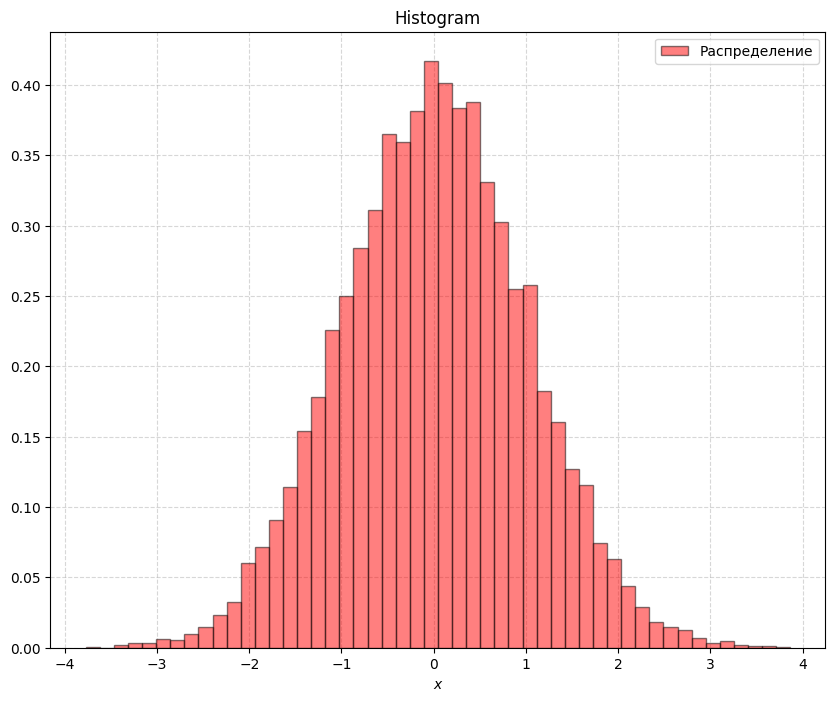

In [52]:
import matplotlib.pyplot as plt
import numpy as np


def create_histogram(list_of_points):
    list_of_points = np.array(list_of_points, dtype=float)
    plt.figure(figsize=(10, 8))
    plt.hist(list_of_points, bins=50, color='r', density=True, edgecolor='k', 
         label='Распределение', alpha=0.5, zorder=2)
    plt.xlabel(r'$x$')
    plt.legend()
    plt.grid(which='both', linestyle='--', alpha=0.5)
    plt.title("Histogram")
    plt.show()


create_histogram(list_of_points)

Точечная оценка матожидания и дисперсии
$${\hat{\mu}} = \frac{1}{n}\sum_{i=1}^{n}{X_i}$$
$${\hat{\sigma}}=\frac{1}{n-1}\sum_{i=1}^{n}{(X_i - \hat{\mu})^2}$$

Интервальная оценка матожидания
$$Z=\frac{(\hat{X} - \hat{\mu}) \sqrt{n}}{\hat{\sigma}} \sim St(n-1)$$
$$\gamma = \frac{1 + \alpha}{2}$$
$$t_{\gamma} = St_{\gamma}(n-1)$$
$$I_{\beta} = [\hat{X} - \frac{\hat{\sigma}}{\sqrt{n}}t_{\gamma}, \hat{X} + \frac{\hat{\sigma}}{\sqrt{n}}t_{\gamma}]$$

Интервальная оценка дисперсии
$$\frac{(n-1)\hat{\sigma}^2}{\sigma^2} \sim \chi^2_{n-1}$$
$$c_1 = \chi_{n-1, \frac{\alpha}{2}}$$
$$c_2 = \chi_{n-1, 1-\frac{\alpha}{2}}$$
$$I_{\beta} = [\frac{(n-1)\hat{\sigma}^2}{c_2}, \frac{(n-1)\hat{\sigma}^2}{c_1}]$$

In [41]:
from scipy import stats

N = len(list_of_points)
points = np.array(list_of_points)
mu = points.mean()
sigma = ((points - mu) ** 2).sum() / (N - 1)

beta = 0.9
gamma = (1 + beta) / 2
t_gamma = stats.t.ppf(gamma, N-1)

low_mu = mu - sigma / np.sqrt(N) * t_gamma
upper_mu = mu + sigma / np.sqrt(N) * t_gamma

chi_stat = (N - 1) * sigma ** 2
c1 = stats.chi2.ppf((1 - beta) / 2, N - 1)
c2 = stats.chi2.ppf((1 + beta) / 2, N - 1)

low_sigma = chi_stat / c2
upper_sigma = chi_stat / c1

In [42]:
print("Точечная оценка матожидания: ", mu)
print("Точечная оценка дисперсии: ", sigma)

print(f"{beta}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]")
print(f"{beta}% интервальная оценка дисперсии: [{low_sigma}, {upper_sigma}]")

Точечная оценка матожидания:  0.011376809694286064
Точечная оценка дисперсии:  0.9973488301944009
0.9% интервальная оценка матожидания: [-0.005029638735571492, 0.02778325812414362]
0.9% интервальная оценка дисперсии: [0.9719835394415435, 1.018276401037707]
Точечная оценка матожидания:  0.011376809694286064
Точечная оценка дисперсии:  0.9973488301944009
0.9% интервальная оценка матожидания: [-0.005029638735571492, 0.02778325812414362]
0.9% интервальная оценка дисперсии: [0.9719835394415435, 1.018276401037707]


In [49]:
print(np.array(list_of_points))

[-0.71022974  1.36258458  0.28581911 ...  0.083411    0.25002301
  0.49627785]
[-0.71022974  1.36258458  0.28581911 ...  0.083411    0.25002301
  0.49627785]
[-0.71022974  1.36258458  0.28581911 ...  0.083411    0.25002301
  0.49627785]


In [44]:
# Task 2 (Биноминальное распределение)
import numpy as np
import math
import random
from scipy.stats import binom


delta = 0.001
r = 50
p = 0.6


def f_x(i):
    return binom.pmf(i, r, p)


def generate_range():
    list_with_ranges = [0]
    i = 0
    while list_with_ranges[i] + delta < 1:
        list_with_ranges.append( f_x(i) + list_with_ranges[-1])
        i += 1
        
    list_with_ranges.append(1)    
    list_with_ranges = list_with_ranges[1:]

    return list_with_ranges


def generate_descreete_value():
    num = generate()
    i = 0
    while num > list_with_ranges[i]:
        i += 1
        
    return i


def real_cdf(num):
    cum_sum = [0]
    for p in list_with_ranges:
        cum_sum.append(cum_sum[-1] + p)
        
    cum_sum = cum_sum[1:] 
    
    result_idx = len(list_with_ranges) - 1
    for idx, p in enumerate(cum_sum):
 
        if num < idx:
            result_idx = max(idx - 1, 0)
            break
            
    return cum_sum[result_idx]


list_with_ranges = generate_range()

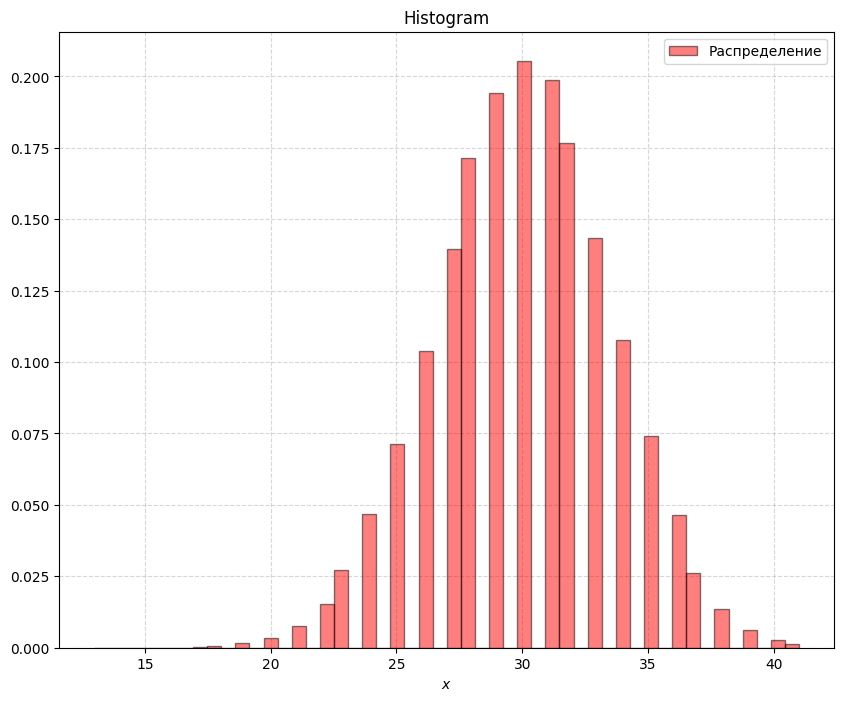

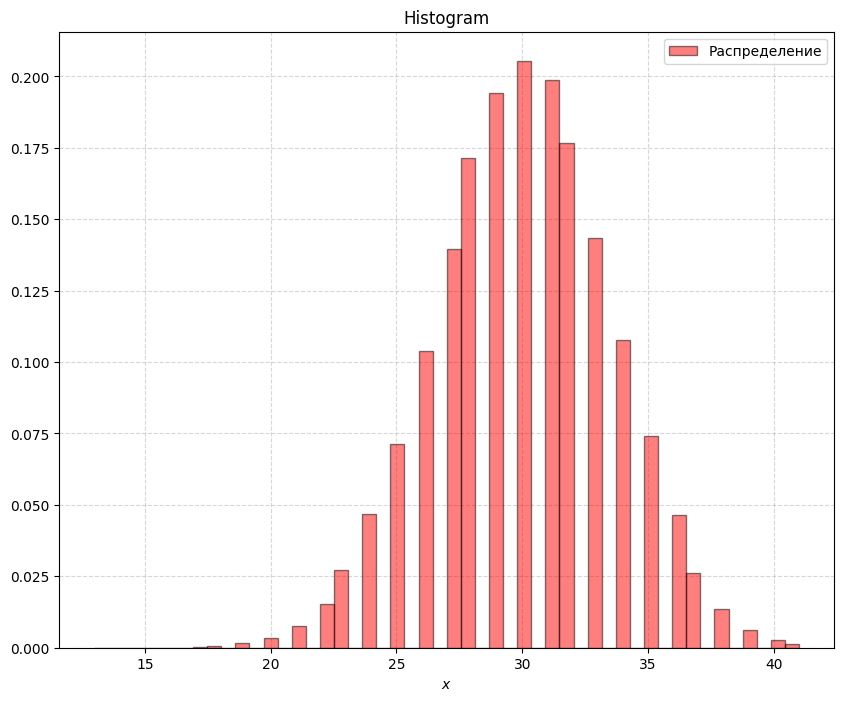

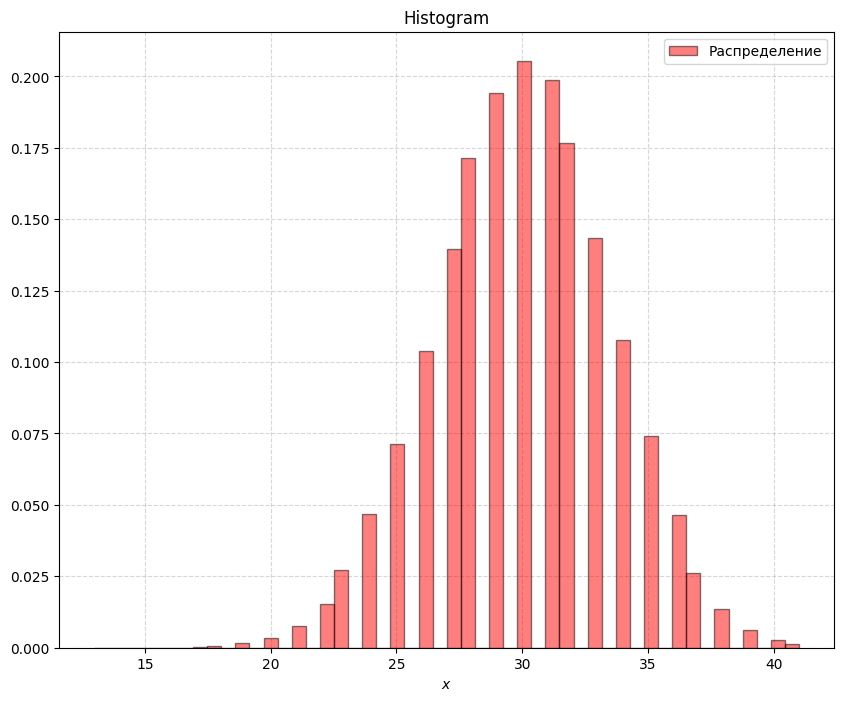

In [45]:
N = 10**6

list_with_points_2 = [generate_descreete_value() for i in range(N)]
create_histogram(list_with_points_2)


In [46]:
from scipy import stats

N = len(list_with_points_2)
mu = (np.array(list_with_points_2)).mean()
sigma = ((list_with_points_2 - mu) ** 2).sum() / (N - 1)

beta = 0.95
gamma = (1 + beta) / 2
t_gamma = stats.t.ppf(gamma, N-1)

low_mu = mu - sigma / np.sqrt(N) * t_gamma
upper_mu = mu + sigma / np.sqrt(N) * t_gamma

In [47]:
print("Точечная оценка матожидания: ", mu)
print("Точечная оценка дисперсии: ", sigma)

print(f"{beta}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]")

Точечная оценка матожидания:  29.999526
Точечная оценка дисперсии:  11.983565758889762
0.95% интервальная оценка матожидания: [29.97603861427788, 30.02301338572212]
Точечная оценка матожидания:  29.999526
Точечная оценка дисперсии:  11.983565758889762
0.95% интервальная оценка матожидания: [29.97603861427788, 30.02301338572212]
Точечная оценка матожидания:  29.999526
Точечная оценка дисперсии:  11.983565758889762
0.95% интервальная оценка матожидания: [29.97603861427788, 30.02301338572212]


In [48]:
ecdf = stats.ecdf(list_with_points_2)

kolmogorov_stat = max(abs(ecdf.cdf.evaluate(x) - real_cdf(x))  for x in np.linspace(0, 1, N)) * np.sqrt(N)
print(kolmogorov_stat)
p_value = 1 - stats.kstwobign.cdf(kolmogorov_stat)

print("p_value: ", p_value)

9.760909621757414e-16
p_value:  1.0
9.760909621757414e-16
p_value:  1.0
9.760909621757414e-16
p_value:  1.0
